In [12]:
import pandas as pd
import os

In [13]:
os.getcwd()

'C:\\Users\\nipin\\Documents\\Python'

In [14]:
movies = pd.read_csv("Movie-Ratings.csv")

In [15]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [16]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film                         559 non-null object
Genre                        559 non-null object
Rotten Tomatoes Ratings %    559 non-null int64
Audience Ratings %           559 non-null int64
Budget (million $)           559 non-null int64
Year of release              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [17]:
movies.describe()

,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [18]:
movies.columns = ["Film","Genre","CriticsRatings","AudienceRatings","BudgetMillions","Year"]

In [19]:
movies.columns

Index(['Film', 'Genre', 'CriticsRatings', 'AudienceRatings', 'BudgetMillions',
       'Year'],
      dtype='object')

In [20]:
len(movies)

559

In [21]:
# As we see in movie info Film, genre are as object while Year of release as integer.But it should suppose to be categorical
# Convert these variables in Catagorical variables!
movies.Film = movies.Film.astype("category") # We will not see the change we need to check info 

In [22]:
# Another option to change variable into category
movies.Genre = movies["Genre"].astype("category")

In [23]:
# Covert year into Categorical variable
movies.Year = movies.Year.astype("category")

In [24]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film               559 non-null category
Genre              559 non-null category
CriticsRatings     559 non-null int64
AudienceRatings    559 non-null int64
BudgetMillions     559 non-null int64
Year               559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [25]:
# To find out levels in genre
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [26]:
movies.describe()

,CriticsRatings,AudienceRatings,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")   
plt.rcParams["figure.figsize"]= 8,4

In [28]:
#Joinplots: this plot is for bivariate distribution and for numerical variable
#and we can see the distribution of both variables on the side of plot

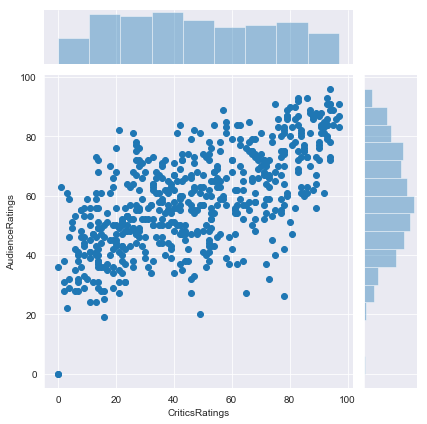

In [29]:
j = sns.jointplot(data = movies, x = "CriticsRatings",y = "AudienceRatings")

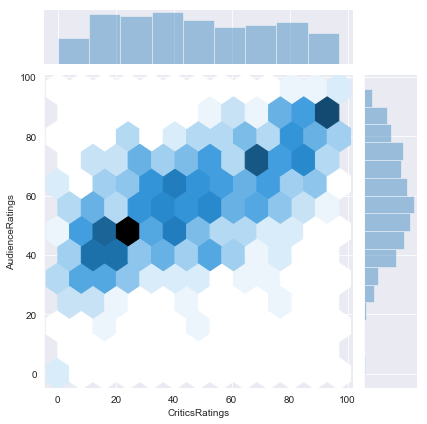

In [30]:
# In the above plot we are not able to see the clusters, to make it clear, in the kind argument choose "hex" and 
# in this plot clusters are very clear and dark in color.
j = sns.jointplot(data = movies, x = "CriticsRatings",y = "AudienceRatings", kind = "hex")

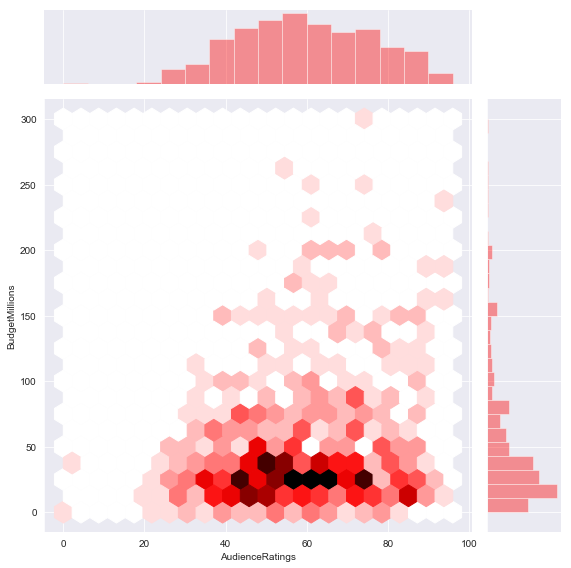

In [31]:
# joint plot using different variables and arguments!
j1 = sns.jointplot(data = movies, x = "AudienceRatings",y = "BudgetMillions",kind = "hex", color = "red",height = 8 )

In [32]:
## Histograms

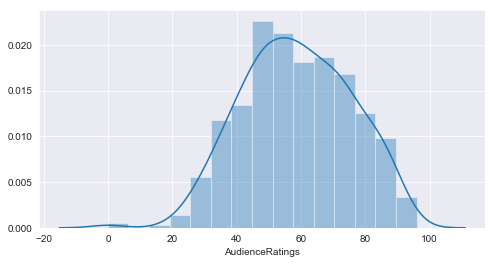

In [33]:
m1 = sns.distplot(movies.AudienceRatings, bins = 15)

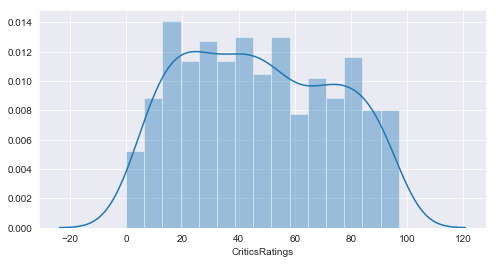

In [34]:
m2 = sns.distplot(movies.CriticsRatings,bins= 15)

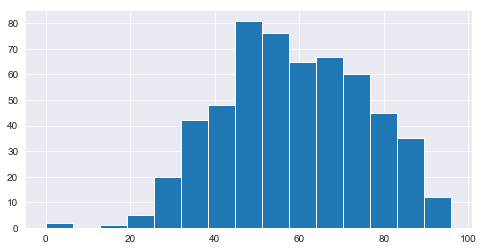

In [35]:
# Normal distribution of Audience Ratings
m3 = plt.hist(movies.AudienceRatings, bins = 15)

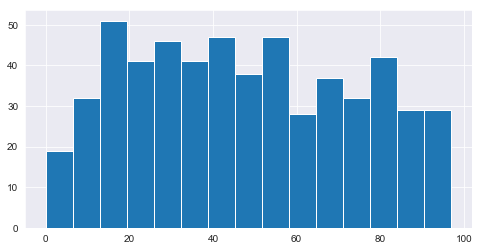

In [36]:
# Uniform distribution of Critics Ratings
m4 = plt.hist(movies.CriticsRatings, bins = 15)

In [37]:
# Stacked Histograms

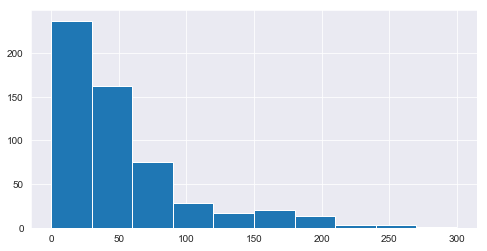

In [38]:
plt.hist(movies.BudgetMillions)
plt.show()

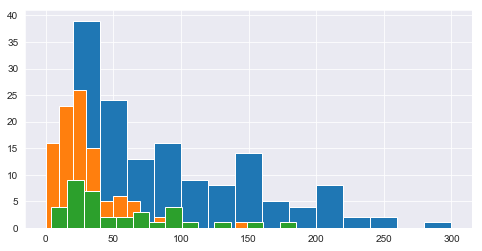

In [39]:
# Filtering the Budget according to Genre and see the graph is hiding behind each other
plt.hist(movies[movies.Genre == "Action"].BudgetMillions, bins = 15)
plt.hist(movies[movies.Genre == "Drama"].BudgetMillions, bins = 15)
plt.hist(movies[movies.Genre== "Thriller"].BudgetMillions, bins = 15)
plt.show()

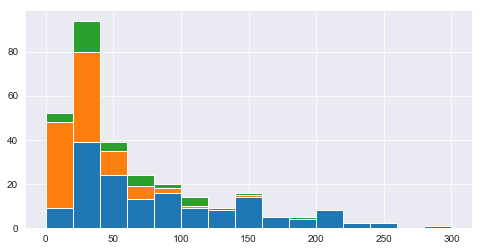

In [40]:
# As we have more genere and if put in the list it will be little tidious to put all the code manually in the list
plt.hist([movies[movies.Genre == "Action"].BudgetMillions, movies[movies.Genre == "Drama"].BudgetMillions,\
         movies[movies.Genre == "Thriller"].BudgetMillions], stacked = True, bins = 15)
plt.show()

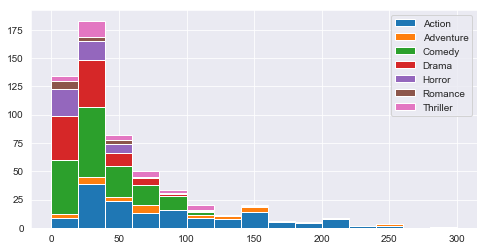

In [41]:
# Create a loop for the list of Genre
list = []
mylabels = []
for gen in movies.Genre.cat.categories:
    list.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)
plt.hist(list, bins = 15, stacked = True,rwidth = 1, label= mylabels)
plt.legend()
plt.show()


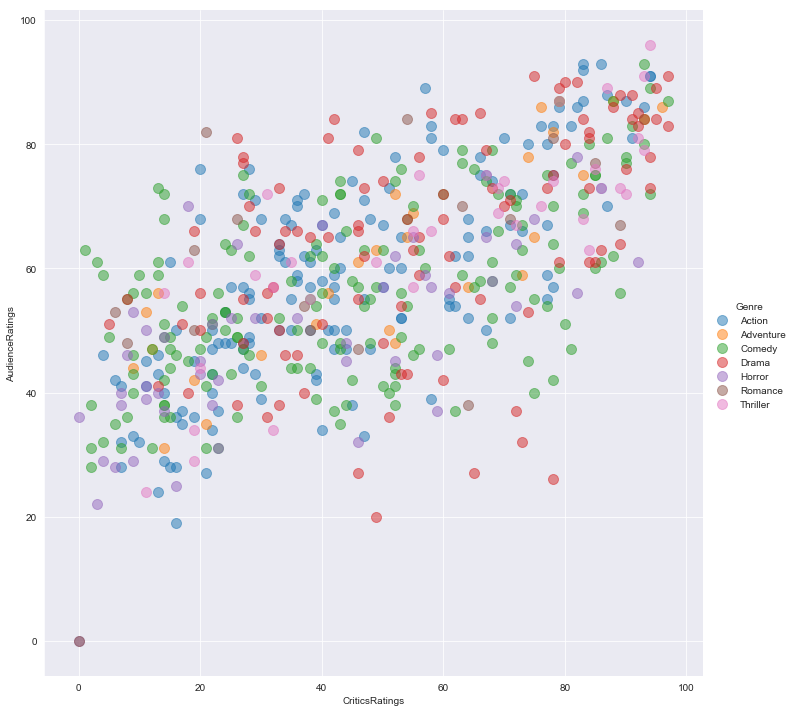

In [42]:
# Customer Ratings Vs Critics Ratings
vs1 = sns.lmplot(data = movies, x = "CriticsRatings", y = "AudienceRatings",fit_reg = False, hue = "Genre",
                 size = 10,\
                scatter_kws = {"s":100,"alpha":0.5})

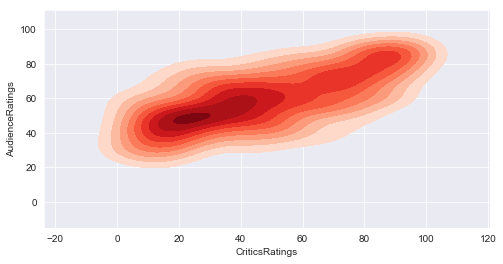

In [43]:
## KDE(Kernel Density Plot) plot for Bivariate numerical variables
k1 = sns.kdeplot(movies.CriticsRatings, movies.AudienceRatings,shade = True, shade_lowest = False, cmap ="Reds")

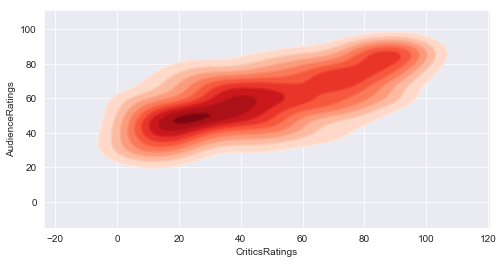

In [44]:
# this way we get more crisp plot 
k1 = sns.kdeplot(movies.CriticsRatings, movies.AudienceRatings,shade = True, shade_lowest = False, cmap ="Reds")
k2 = sns.kdeplot(movies.CriticsRatings,movies.AudienceRatings, cmap = "Reds")

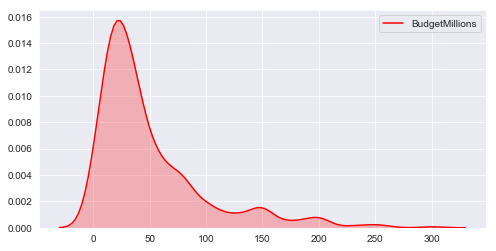

In [45]:
# Kernel density plot for Univariate numeric variable
k3 = sns.kdeplot(movies.BudgetMillions,shade = True, color = "r")

In [46]:
# Working with subplots,combine the visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set_style("dark")


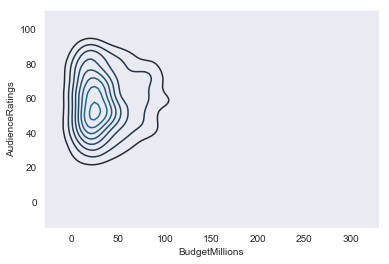

In [47]:
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRatings)

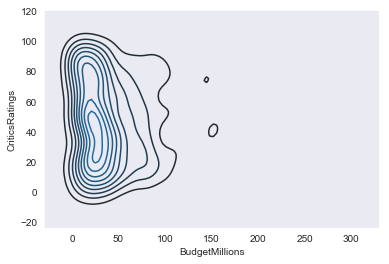

In [48]:
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticsRatings)

[(-20, 160)]

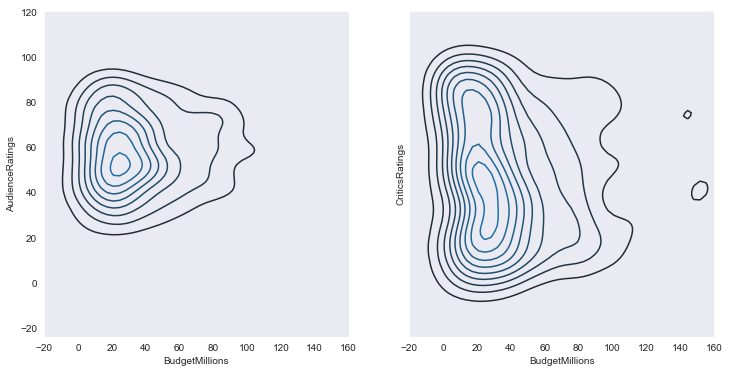

In [49]:
# One diemnsion subplotting, we can see using sharex and sharey we can compare both plots at same scale
f,axes = plt.subplots(1,2, figsize = (12,6,), sharex = True, sharey = True)
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRatings, ax = axes[0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticsRatings, ax = axes[1])
k1.set(xlim = (-20,160))

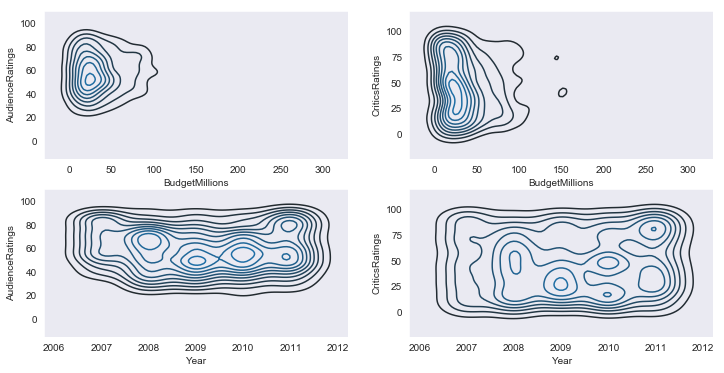

In [50]:
# Suppose if we want to create 2 rows and 2 columns in subplots or 3 dimesion subplots we need to specify the position 
# for axes to
f, axes = plt.subplots(2,2, figsize =(12,6))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRatings, ax = axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticsRatings, ax = axes[0,1])
k3 = sns.kdeplot(movies.Year, movies.AudienceRatings, ax = axes[1,0])
k4 = sns.kdeplot(movies.Year, movies.CriticsRatings, ax = axes[1,1])



In [51]:
# Comparing box plots and Violin plot
w = sns.boxplot(data = movies, x= "Genre", y = "CriticsRatings")

IndentationError: unexpected indent (<ipython-input-51-8147ffd9a786>, line 2)

In [ ]:
# Violin Plots
z = sns.violinplot(data = movies, x = "Genre", y = "CriticsRatings")

In [ ]:
# Facet Grid
g = sns.FacetGrid(movies, row = "Genre",col = "Year", hue = "Genre")
kws = dict(s = 50, linewidth = 0.5, edgecolor = "black")# kws mean keyword arguments
g = g.map(plt.scatter, "CriticsRatings","AudienceRatings",**kws) # Remember to put 2 stars before the kws argument

In [ ]:
# Controlling Axes and Adding diogonals for better comparision between critics ratings and audience ratings, as we can see
# left most top movies got the highest audience ratings while right most got the highest critics ratings!
g = sns.FacetGrid(movies, row = "Genre", col = "Year", hue = "Genre")
kws = dict(s = 50, linewidth = 0.5, edgecolor = "black")
g = g.map(plt.scatter, "CriticsRatings", "AudienceRatings",**kws)
g.set(xlim = (0,100), ylim = (0,100))
for ax in g.axes.flat:
    ax.plot((0,100),(0,100), c = "gray", ls = "--")
g.add_legend()
plt.show()

In [ ]:
g = sns.FacetGrid(movies, row = "Genre",col = "Year", hue = "Genre")
g = g.map(plt.hist, "BudgetMillions")

In [ ]:
# Building Dashboards
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

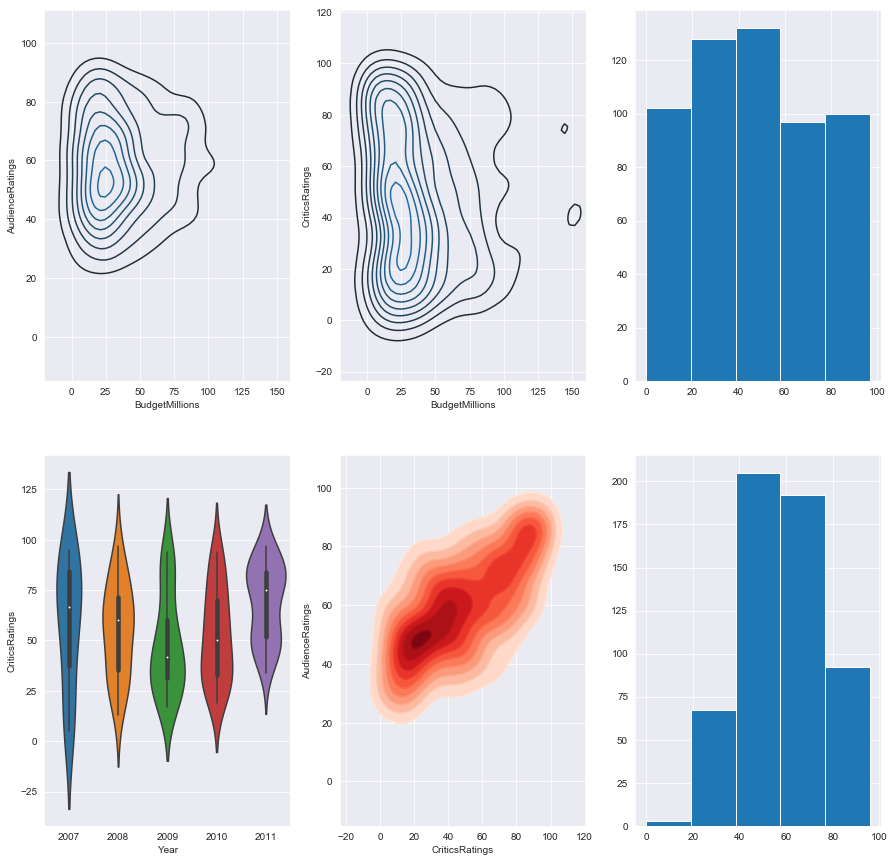

In [65]:
sns.set_style("darkgrid")
f, axes = plt.subplots(2,3, figsize = (15,15)) 
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRatings, ax = axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticsRatings, ax = axes[0,1])
k1.set(xlim = (-20,160))
k2.set(xlim = (-20,160))
k3 = sns.violinplot(data = movies[movies.Genre == "Drama"], x = "Year", y = "CriticsRatings", ax = axes[1,0])
k4 = sns.kdeplot(movies.CriticsRatings, movies.AudienceRatings,shade = True, shade_lowest = False, cmap ="Reds",ax = axes[1,1])
K4b = sns.kdeplot(movies.CriticsRatings,movies.AudienceRatings, cmap = "Reds", ax = axes[1,1])
### We can also add non seaborn plot to this dashboard but for that we need to specify axes in the begining. As axes
### is a pyplot object.We can use axes.hist because hist is part of pyplot while violinplot and kdeplotare not!
axes[0,2].hist(movies.CriticsRatings, bins = 5)
axes[1,2].hist(movies.AudienceRatings, bins = 5)
plt.show()

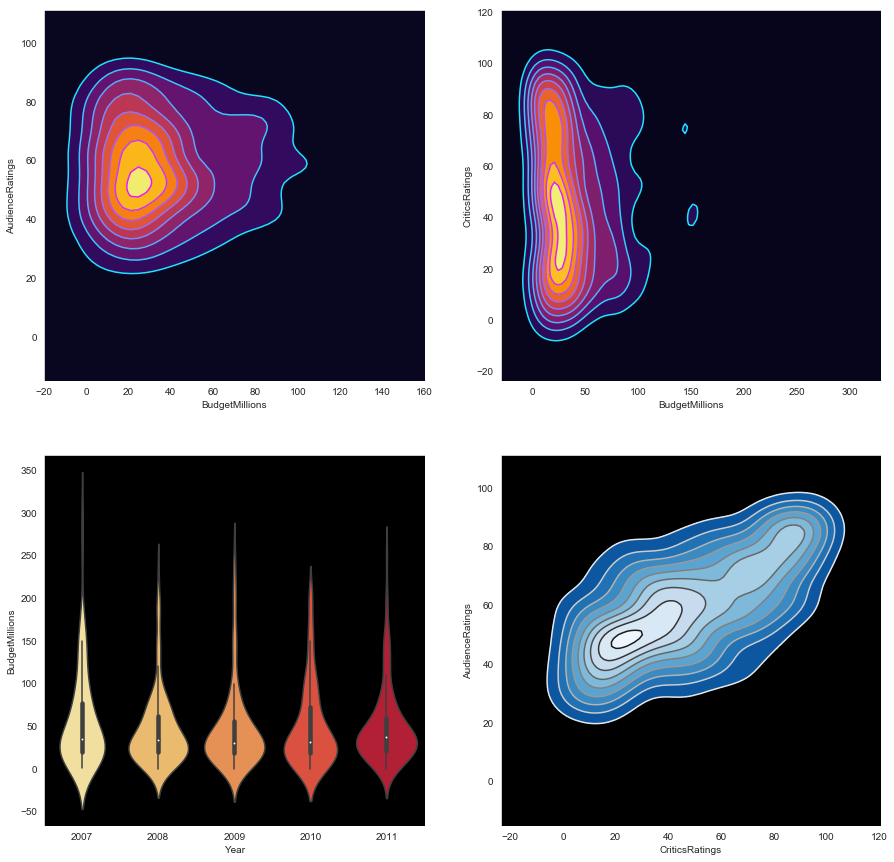

In [84]:
# Styling dashboard
sns.set_style("dark",{"axes.facecolor":"black"})# changing the color of grid into black adding dictionary
f, axes = plt.subplots(2,2,figsize = (15,15))
# plot(0,0),making 2 separate plots this way we will get more bright colors in the plot
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRatings, \
                shade = True, shade_lowest = True, cmap = "inferno", ax = axes[0,0])
K1b = sns.kdeplot(movies.BudgetMillions, movies.AudienceRatings,\
                 cmap = "cool", ax = axes[0,0])
# plot(0,1)
K2 = sns.kdeplot(movies.BudgetMillions, movies.CriticsRatings,\
                 shade = True, shade_lowest = True, cmap = "inferno", ax = axes[0,1])
K2b = sns.kdeplot(movies.BudgetMillions, movies.CriticsRatings,\
                 cmap = "cool", ax = axes[0,1])
k1.set(xlim = (-20,160))
k2.set(xlim = (-20,160))
# plot(1,0)
k3 = sns.violinplot(data = movies,\
                    x = "Year", y = "BudgetMillions", ax = axes[1,0],\
                    palette = "YlOrRd")
# plot(1,1)
k4 = sns.kdeplot(movies.CriticsRatings, movies.AudienceRatings,shade = True, shade_lowest = False, cmap ="Blues_r",\
                 ax = axes[1,1])
K4b = sns.kdeplot(movies.CriticsRatings,movies.AudienceRatings, cmap = "gist_gray_r", ax = axes[1,1])
    

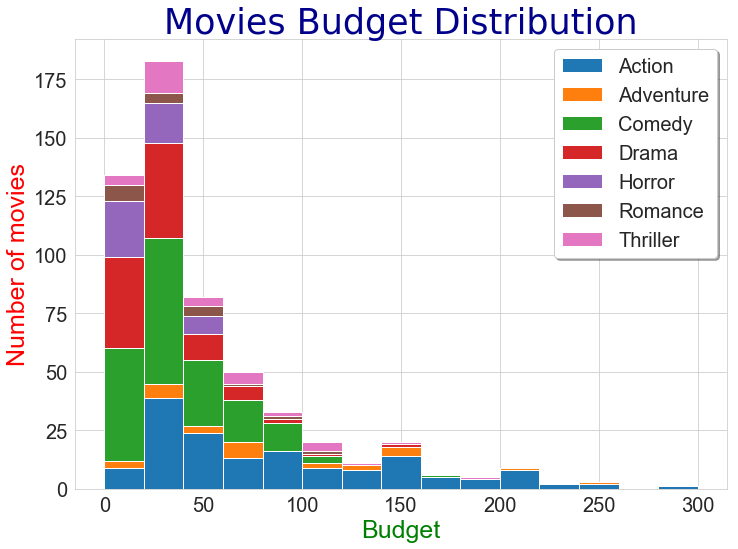

In [105]:
# Thematic Editing
sns.set_style("whitegrid")
list = []
mylabels = []
for gen in movies.Genre.cat.categories:
    list.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)
fig,ax = plt.subplots()
fig.set_size_inches(11.7,8.27) # A4 size paper
plt.hist(list, bins = 15, stacked = True,rwidth = 1, label= mylabels)
plt.title("Movies Budget Distribution", fontsize=30, color ="DarkBlue", fontname = "Console" )
plt.ylabel("Number of movies", fontsize = 25, color = "Red")
plt.xlabel("Budget", fontsize = 25, color = "Green")
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
# Change the size of legend
plt.legend(frameon = True, fancybox = True, shadow = True, framealpha =1,prop = {"size":20})
plt.show()
